1️⃣ Qual é a taxa geral de inadimplência da base de clientes?
2️⃣ A base está desbalanceada entre bons e maus pagadores?
3️⃣ Qual o perfil médio dos clientes (idade, renda, score)?

In [ ]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#carregando dados
credito = pd.read_csv("/content/dados_credito.csv")

In [ ]:
df_credito = pd.DataFrame(credito)

In [ ]:

df_credito.head()

,idade,renda_mensal,tempo_emprego,valor_credito,prazo_meses,score_credito,qtde_atrasos,possui_imovel,possui_veiculo,inadimplente
0,59,9737,24,6097,24,495,1,1,1,0
1,49,4151,13,21577,24,361,0,0,0,0
2,35,4293,13,9026,48,562,1,0,1,0
3,63,1200,12,5230,12,411,2,1,1,0
4,28,6142,6,12606,24,477,0,0,0,0


In [ ]:
print("Dimensões do conjunto:",df_credito.shape)

Dimensões do conjunto: (2000, 10)


In [ ]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   idade           2000 non-null   int64
 1   renda_mensal    2000 non-null   int64
 2   tempo_emprego   2000 non-null   int64
 3   valor_credito   2000 non-null   int64
 4   prazo_meses     2000 non-null   int64
 5   score_credito   2000 non-null   int64
 6   qtde_atrasos    2000 non-null   int64
 7   possui_imovel   2000 non-null   int64
 8   possui_veiculo  2000 non-null   int64
 9   inadimplente    2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB


In [ ]:
df_credito.isnull().sum()

,0
idade,0
renda_mensal,0
tempo_emprego,0
valor_credito,0
prazo_meses,0
score_credito,0
qtde_atrasos,0
possui_imovel,0
possui_veiculo,0
inadimplente,0


In [ ]:
df_credito.describe()

,idade,renda_mensal,tempo_emprego,valor_credito,prazo_meses,score_credito,qtde_atrasos,possui_imovel,possui_veiculo,inadimplente
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000
mean,45.235000,5105.990000,14.809000,19670.003000,36.558000,572.96300,1.482000,0.411000,0.517500,0.22000
std,14.044942,2000.698131,8.535159,9673.743079,17.245676,160.88492,1.210954,0.492138,0.499819,0.41435
min,21.000000,1200.000000,0.000000,1000.000000,12.000000,300.00000,0.000000,0.000000,0.000000,0.00000
25%,33.000000,3700.000000,8.000000,13180.250000,24.000000,433.00000,1.000000,0.000000,0.000000,0.00000
50%,46.000000,5134.000000,15.000000,19627.500000,36.000000,575.00000,1.000000,0.000000,1.000000,0.00000
75%,57.000000,6464.250000,22.000000,26206.250000,48.000000,712.25000,2.000000,1.000000,1.000000,0.00000
max,69.000000,11520.000000,29.000000,51520.000000,60.000000,850.00000,7.000000,1.000000,1.000000,1.00000


In [ ]:
print(df_credito[[]])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2000 rows x 0 columns]


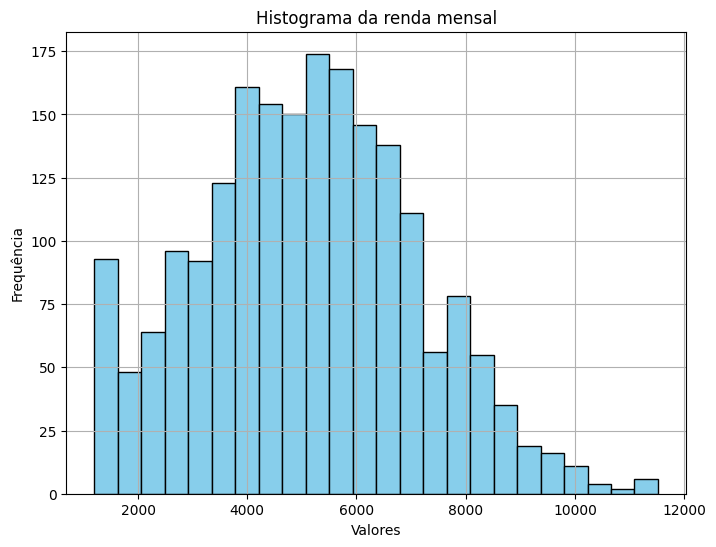

In [ ]:
df_credito.hist(column= "renda_mensal" ,bins="auto", color="skyblue", edgecolor="black", figsize=(8
                                                                                                  , 6))
plt.title('Histograma da renda mensal')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

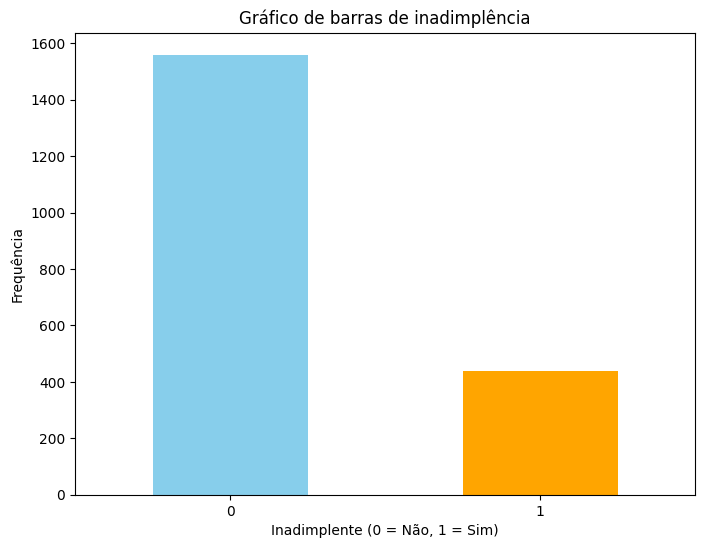

In [ ]:
df_credito['inadimplente'].value_counts().plot(kind='bar', figsize=(8,6), color=['skyblue', 'orange'])

plt.title("Gráfico de barras de inadimplência")
plt.xlabel("Inadimplente (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.xticks(rotation=0)

plt.show()

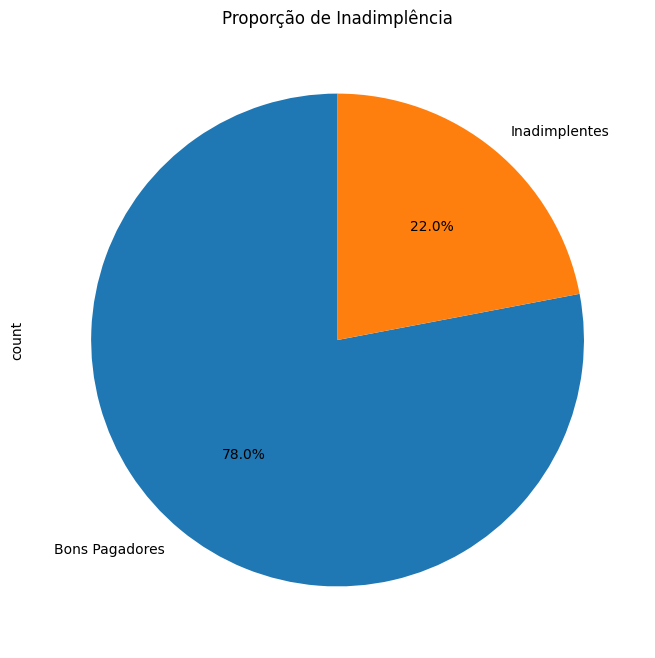

In [ ]:
# 1. Primeiro definimos a variável
labels = ['Bons Pagadores', 'Inadimplentes']

# 2. Depois a utilizamos no gráfico
df_credito['inadimplente'].value_counts().plot.pie(labels=labels, autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title("Proporção de Inadimplência")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

features = [
    'idade', 'renda_mensal', 'tempo_emprego',
    'valor_credito', 'prazo_meses', 'score_credito',
    'qtde_atrasos', 'possui_imovel', 'possui_veiculo'
]

X = df_credito[features]
y = df_credito['inadimplente']

y.value_counts(normalize=True)

,proportion
inadimplente,
0,0.78
1,0.22


In [ ]:
# Divide os dados em conjuntos de treino (70%|) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculando os pesos para exibição no print
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, weights))

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=20,
    class_weight='balanced',    # O parâmetro do modelo
    random_state=42
)

model.fit(X_train, y_train)

print("Modelo re-treinado com sucesso usando pesos balanceados!")
print("Pesos calculados:", class_weight_dict)
print(y.value_counts(normalize=True))

Modelo re-treinado com sucesso usando pesos balanceados!
Pesos calculados: {np.int64(0): np.float64(0.6410256410256411), np.int64(1): np.float64(2.272727272727273)}
inadimplente
0    0.78
1    0.22
Name: proportion, dtype: float64


In [ ]:
# Avaliando modelo com recall
from sklearn.metrics import recall_score

# 1. Gerar as previsões do modelo usando os dados de teste
y_pred = model.predict(X_test)

# 2. Calcular o recall comparando os valores reais (y_test) com os previstos (y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Recall (Inadimplentes):", recall)

Recall (Inadimplentes): 0.75


In [ ]:
# Avaliando modelo com auc_score
from sklearn.metrics import roc_auc_score

# Comparando os valores reais de teste com as previsões (ambos possuem 600 registros)
roc_auc = roc_auc_score(y_test, y_pred)

print("roc_auc:", roc_auc)

roc_auc: 0.7467948717948718


In [ ]:
# relatório com precision, recall e f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       468
           1       0.45      0.75      0.56       132

    accuracy                           0.74       600
   macro avg       0.68      0.75      0.69       600
weighted avg       0.81      0.74      0.76       600



In [ ]:
# Média de idade, renda mensal e score
idade_media = df_credito["idade"].mean()
renda_media = df_credito["renda_mensal"].mean()
score_medio = df_credito["score_credito"].mean()

print(f"-- perfil médio --")
print("Média da idade:", idade_media)
print("Média da renda:", renda_media)
print("Média do score:", score_medio)

-- perfil médio --
Média da idade: 45.235
Média da renda: 5105.99
Média do score: 572.963


In [ ]:
df_credito.columns

Index(['idade', 'renda_mensal', 'tempo_emprego', 'valor_credito',
       'prazo_meses', 'score_credito', 'qtde_atrasos', 'possui_imovel',
       'possui_veiculo', 'inadimplente'],
      dtype='object')

In [ ]:
df_credito.groupby('inadimplente')[['idade', 'renda_mensal', 'score_credito']].mean()

,idade,renda_mensal,score_credito
inadimplente,,,
0,45.233333,5263.069231,595.889744
1,45.240909,4549.072727,491.677273


In [ ]:
# Agora vou produzir um modelo para saber qual é o perfil do cliente da base de dados.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:

# Selecionar colunas para o modelo usando .copy() para evitar o SettingWithCopyWarning
X = df_credito[[ 'renda_mensal', 'score_credito']].copy()

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicar K-Means (ex: 3 grupos)
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Analisar os grupos
print(X.groupby('cluster').mean())








         renda_mensal  score_credito
cluster                             
0         7086.672850     664.374368
1         3537.019262     691.060995
2         4854.617347     409.975765


In [ ]:
cluster_labels = {
    0: 'Cluster 0 – Renda alta / Score médio',
    1: 'Cluster 1 – Baixo score / Maior risco',
    2: 'Cluster 2 – Alto score / Melhor perfil'
}


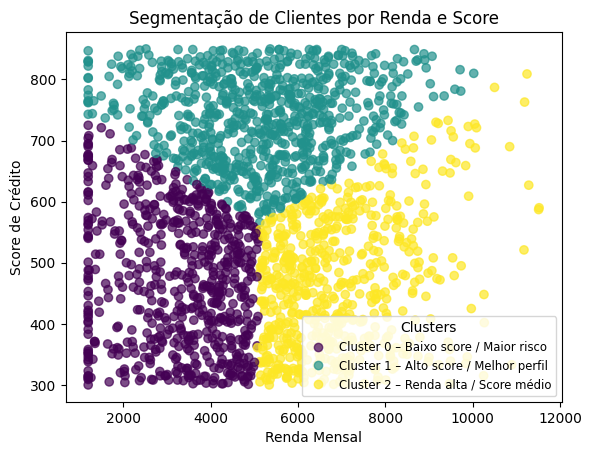

In [ ]:
# Atribuindo os resultados dos clusters ao DataFrame X para possibilitar a plotagem
X['cluster'] = clusters

scatter = plt.scatter(
    df_credito['renda_mensal'],
    df_credito['score_credito'],
    c=X['cluster'],
    alpha=0.7
)

# Labels e título
plt.xlabel('Renda Mensal')
plt.ylabel('Score de Crédito')
plt.title('Segmentação de Clientes por Renda e Score')

handles, _ = scatter.legend_elements()
labels = [cluster_labels[i] for i in sorted(X['cluster'].unique())]
plt.legend(
    handles,
    labels,
    title='Clusters',
    loc='best',
    fontsize="small"
)
# Mostrar
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score



In [ ]:
sil_score = silhouette_score(X_scaled, X['cluster'])
print(f"O coeficiente de Silhouette: {sil_score:.4f}")

O coeficiente de Silhouette: 0.3606


In [ ]:
 """
 1️⃣ Qual é a taxa geral de inadimplência da base de clientes?
 A taxa geral de inadimplência da base de clientes é de 22%, indicando que aproxi
 madamente 1 em cada 5 clientes é inadimplente.
 2️⃣ A base está desbalanceada entre bons e maus pagadores?
 A base está desbalanceada, pois aproximadamente 78% dos clientes são bons pagado
 res e 22% são inadimplentes.
 O modelo desenvolvido ajuda identificar mais fácil os inadimplentes que passavam
 despercebidos no início.
 3️⃣ Qual o perfil médio dos clientes (idade, renda, score)?
 Os perfis da base de dados são compostos por, em sua maioria, adulto jovem de
 renda alta e com score médio para alto. os clusters indicam que clientes de bai
 xa renda e com baixo score são os inadimplentes.

 """